# Machine Learning Project Steps:
1. Look at the big picture
2. Get the Data
3. Discover and visualize the data to gain insights
4. Prepare the data for ML algorithms
5. Select a model and train it
6. Fine tune your model
7. Present your solution
8. Launch, monitor, and maintain your system

## 2. Get the data

In [1]:
# Import the neccessary libararies for basic ML project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import libraries and create function to fetch data
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
# Call function to create directory in workspace, download zip file, extract housing.csv
fetch_housing_data()

In [4]:
# Function to load data using pandas
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
# Look at data top 5 rows
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Quick description of data to # of rows, types, nulls
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Quick Observations from head() and info():
>- 20,640 instances in dataset
>- total_bedrooms has only 20,433 nonull values, 207 districts are missing this feature
>- ocean_proximity is the only nonnumerical column, object type so it can be any Python object but data is from csv so its text
>- looking at the head() ocean_proximity was the same so its probably categorical in which case we have to see what categories exist


In [8]:
# Look at what categories exist in ocean_proximity column
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# Look at the summary of other numberical attributes using describe()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


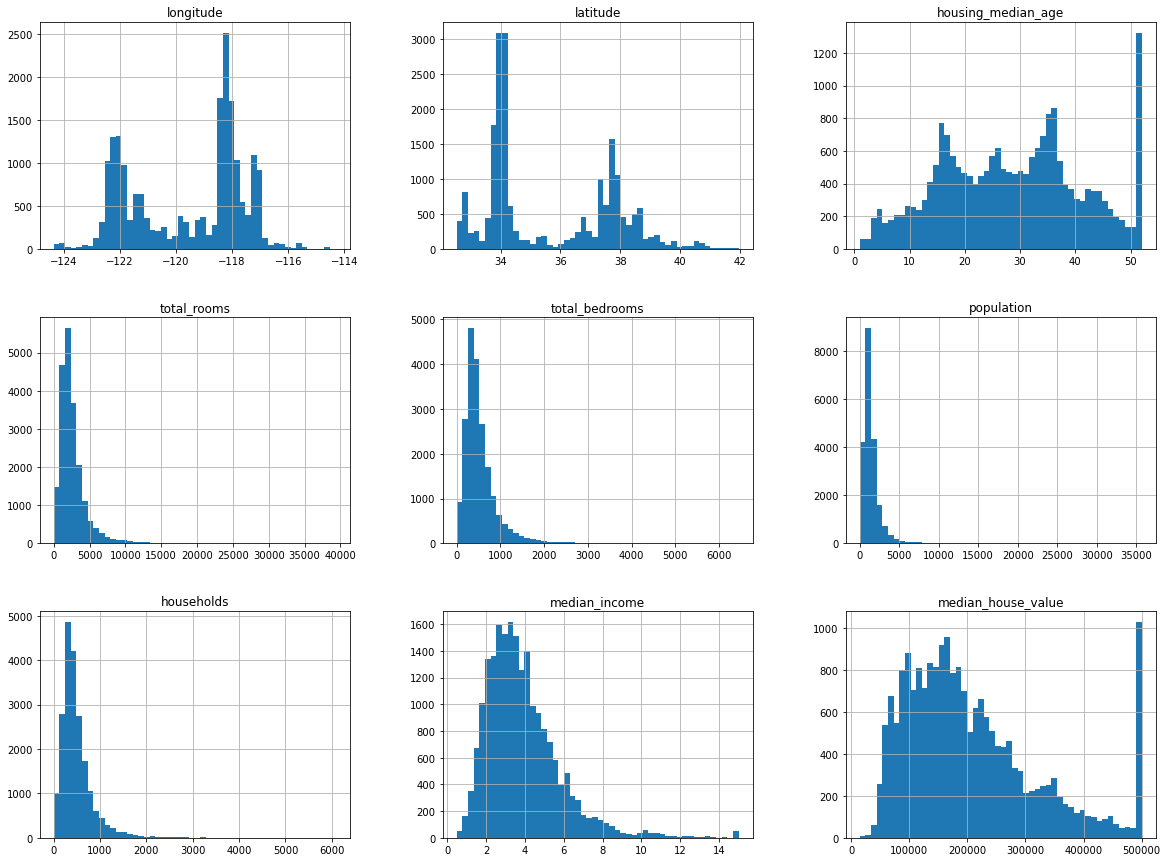

In [10]:
# Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Data observation through hist()
1. median_income is not expressed in dollars, asking about the data we find out 1=10k, 15 is higher median income .5 is lower
>- housing_median_age and median_house_value is also capped which can be a serious problem because it is the target value
2. the ML algorithm may learn the prices never go beyond that limit so we need to check with client team(the team that will use the output) to see if its a problem or not. If they tell me they need precise predictions even beyond 500,000 then I have 2 choices
>>- Collect proper labels for the disctricts whose labels were capped
>>- Remove districts from training set(and test set because your system should not be evaluated poorly if it predicts values beyond $500,000
3. The attributes have different scales. We will have to do feature scaling.
4. Many histograms are tail-heavy. They extend much farther to the right of the median than to the left. This may make it a bit harder for some ML algos to detect patterns. We will try transforming these attriutes later on to have more bell-shaped distributions

### Create Test Set

In [10]:
# Function to split data in to train and test
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# Use split function
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [12]:
len(test_set)

4128

## Problems with splitting
The normal split function wors but eventually the algo will get to see the whole dataset which we want to avoid - overfitting?
1. A solution is to save the test set on the first run and then load it in subsequent runs. 
2. Another solution is to set the random number generator's seed (ex. with np.random.seed(42)) before calling np.random.permutation() so it always generates the same shuffled indices

### Both solutions break when fetching an updated dataset
To have a stable train test split even after updating the dataset, a common solution is to use each instance's identifier to decide whether or not it should go in the test set (assuming instanecs have a unique and immutable identifier)
For example you could compute a hash of each instance's identifier and put that instance in the test set if the test set will remain consistent across multiple runs, even if you refresh the dataset. THe new test set will contain 20% of the new instances, but it will not contain any instace that was previously in the training set.

In [13]:
# Implementation of hash indexing split
from zlib import crc32
def test_set_check (identifier, test_ratio):
    return crc32(np.int64(identifer)) & 0xfffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
# THe housing dataset doesn not hae a identifier colbumn. The simplest solutiin is to use the row index as the ID
housing_with_id = housing.reset_index() #adds an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

NameError: name 'identifer' is not defined

### Problem with using row index as unique identifer:
If using row index as a unqiue identifier, you need to make sure that new data gets appended to the end of the dataset and that now rows ever gets deleted. If this is not possible, then use the most stable features to build a unique identifer. For example district's latitude and longitude are guaranteed to be stable for a few million years so you could combine then into an ID like so:


In [15]:
# Using long lat as ID
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

NameError: name 'identifer' is not defined

### Scikit-Learn has train_test_split() which is the same as split_train_test() function we made earlier, but it also has 2 additional features"
1. random_state paramter that allows you to set a random generator seed
2. you can pass it multiple datasets with an identical number of rows and it will split them on the same same indices(this is very useful, for example, if you have a seperate dataframe for labels)

In [16]:
# scikit learns train_test_split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [17]:
# Apply stratified sampling, creating a right number of instances for each subgroup of the data ex. population of males to females
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1,2,3,4,5])

<AxesSubplot:>

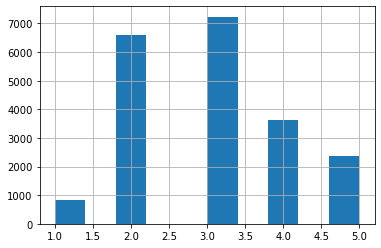

In [18]:
# Showing income categories
housing["income_cat"].hist()

In [19]:
# Now ready to do stratified sampling based on income category, use scikit-learn's StratifiedShuffledSplit class
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
# Check by looking at the income category proportion in the test set
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

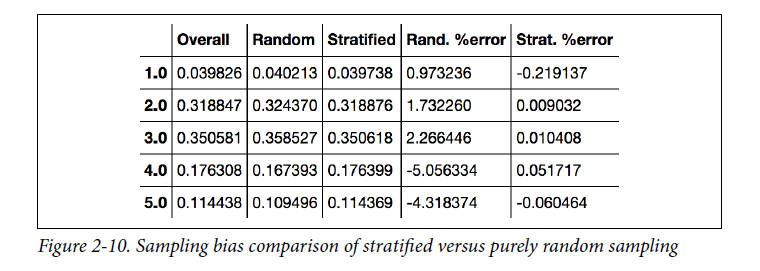

### Using the code yu can measure the income category proportions in the full dataset. 
- The test set generated with stratified sampling is nearly identical to the overall dataset income category proportions.
- THe test set generated with purely random sampling is skewed

In [21]:
# Remove income_cat so the data is bac to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 3. Discover and Visualize the Data to Gain Insights

Put the test set aside and only explore the training set.
- If training set is very large, you may want to sample an exploration set, to make mainpulations easy and fast
- This case the set is small so just work directly on the full set
- Create a copy so that you can play with it without harming the training set

In [22]:
# Copy training set
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

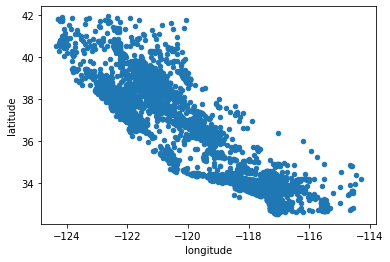

In [23]:
# Visualize geographical data
# Because there is lat and longitude its a good idea to create a scatterplot of all disctricts to visualize the data
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

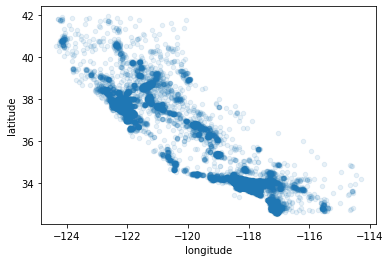

In [24]:
# We can see its california but hard to see any patter, setting alpha option to 0.1 amkes it easier to visualize the places where there is high density of data points
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

You can clearly see hihg desnity areas in bay area, LA, san diego and fairly high in central valley around scramento and fresno

Our brains are very good at spotting patterns in pictures, but you may need to play around with visualiztion parameters to make patterns stand out

## Now lets look at housing prices
- the radius of each circle represnts the districts population(option s) and the color represents the price(option c).
- we use a predefined color map (option cmap) called jet which ranges from blue(low values) to red(high prices)

<function matplotlib.pyplot.legend(*args, **kwargs)>

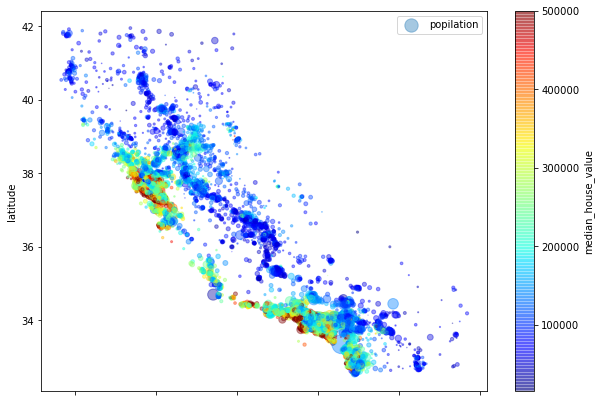

In [25]:
# Visualize housing price by color and district population by circle size
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="popilation", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend

### Image tells you that housing prices are very much related to the location (e.g., close to the ocean) and to the population density.
- Clustering alogrithm should be useful for detecting the main cluster and for adding new features that measure the proximity to the cluster centers
- THe ocean proximity attribute may be useful as well, although in Northern California the housing prcies in costal districts are not too high, so not a simple rule

### Looking for correlations
- Since the dataset is not too large you can easily compute the standard correlation coefficent (also called Pearson's r) between every pair of attributes using the corr() method:

In [26]:
# corr
corr_matrix = housing.corr()
# Now let's lok at how much each attribute correlates with the median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

### Correlation coefficent ranges from -1 to 1
- When it is close to 1, it means that there is a strong positive correlation; for example the median house value tends to go up when the median income goes up
- When the corefficent is close to -1, it means that there is a strong negative correlation; you can see a small negative correlation between latitude and median house value (i.e., prices have a slight tendency to go down when you go north)
- Coefficent close to 0 mean that there is no linear correlation

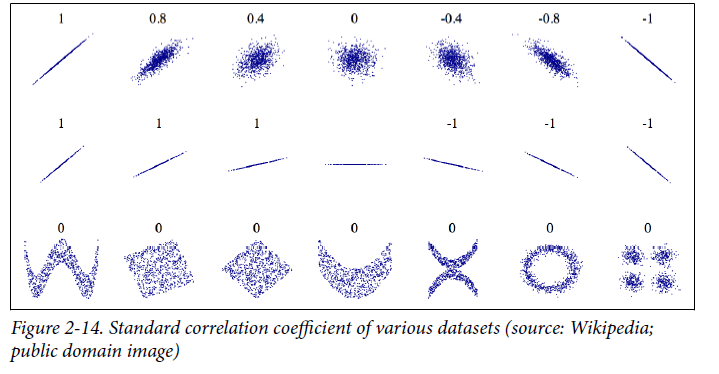

- Correlation coefficent ony measures linear correlations ("if x goes up, then y generally goes up/down"). It may completely miss out on nonlinear relationshops (e.g. "if x is close to 0, then y generally goes up"). Note how botton row have a correlation coefficent equal to 0, despite the fact that their axes are clearly not independent: these are examples of nonlinear relationships.
- Also second row shows exmaples where the correlation is equal to 1 or -1; notice that htis has nothing to do with slope. For example, your heigh in inches has a correlation coefficet of 1 with your heigh in feet or in nanometers

### Another way to check for correlation between attributes is no use the pandas scatter_matrix() function, which plots every numerical attribute against every other numerical attribute.
- SInce there are now 11 numerical attributes, you would get 11^2 = 121 plots which would not fit on a page - so let's just focus on a few promising attribtes that seem most correlated with the median housing value:

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

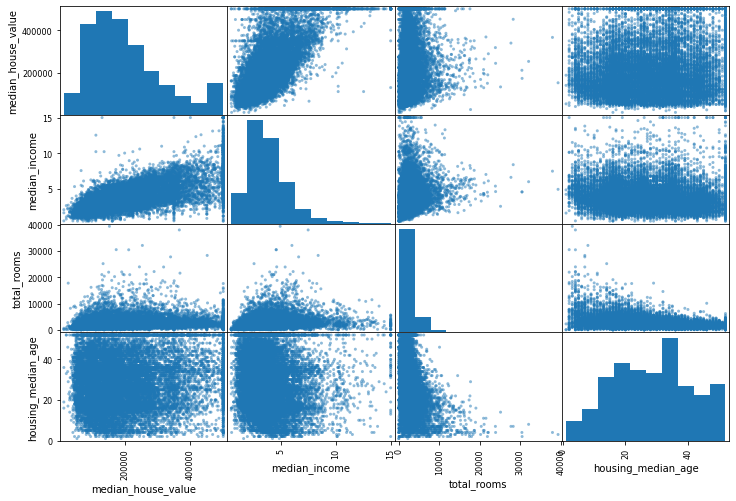

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))